# Handcraft

In [ ]:
#library
import cv2
import numpy as np
import numpy.matlib as ml
import sklearn.neighbors as sn
import skimage.transform as skt
from skimage import io
import matplotlib.pyplot as plt
data = [];
labelTr= [];

In [ ]:
# Training Image Loader and Feature Extraction
for _classname in range(1,16):
  for _id in range(1, 64):
    path = '/content/drive/MyDrive/Tr/emoji/i (' + str(_classname) + ')/t (' + str(_id) + ').pgm';
    img= cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    img= cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
    data.append(np.array(img).reshape(-1,1))
    labelTr.append(_classname)

tmpShape= np.array(data).shape;
data = np.reshape(np.array(data), (-1, tmpShape[1])).T#

In [ ]:
# ขั้นที่1 คำนวณ Mean
meanData= np.array(np.mean(data,1));
meanVector= np.array(meanData).reshape((meanData.shape[0],-1));
data_mean = data - meanVector;
tmp= np.array(meanData).reshape((meanData.shape[0],-1))

# ขั้นที่2 Covariance Matrix
cov= (1.0/(data_mean.shape[0]-1))*(np.dot(data_mean.T, data_mean));

# ขั้นที่3 สกัด Eigenvector และ Eigenvalue จํากนั้นทำการจัดเรียงจากมากไปน้อย
val, vec = np.linalg.eigh(cov);
idx= val.argsort()[::-1]
val= val[idx]
vec= vec[:,idx]

#ขั้นที่4 ระบุจำนวน Eigenvector ที่ต้องการ
PCs = 10
SelectedVec= vec[:,0:PCs]

#ขั้นที่5 Training Feature Extraction by using first ten eigenvectors
EigenFace= np.dot(data_mean, SelectedVec);
featureTr= np.dot(EigenFace.T, data_mean);
featureTr= featureTr.T;
print("yes")

yes


Answer is [1]
(32, 32)
(231, 195)


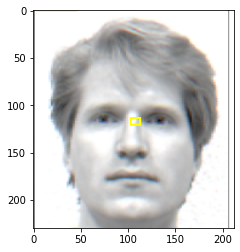

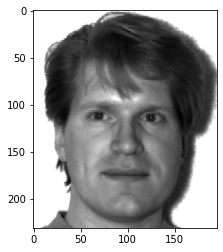

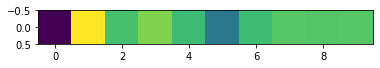

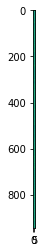

In [ ]:
# ขั้นที่6 Testing Feature Extraction by using first ten eigenvectors
path = '/content/unknown3.png';
img= cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img= cv2.resize(img, (32,32), interpolation = cv2.INTER_AREA)
tmpTs= np.array(img).reshape(-1,1)
featureTs= np.dot(EigenFace.T, tmpTs-meanVector).T;
labelTs= 2

# ขั้นที่7 Image Classification 
classifier = sn.KNeighborsClassifier(n_neighbors=1)
classifier.fit(featureTr, labelTr)
out = classifier.predict(featureTs)
print('Answer is ' + str(out))

path_origin = '/content/drive/MyDrive/Tr/emoji/i (' + str(out[0]) + ')/t (1).pgm';
pic =cv2.imread(path_origin,cv2.COLOR_BGR2GRAY)

read_input = io.imread(path)
read_origin = cv2.imread(path_origin) 

print(img.shape)
print(pic.shape)
plt.imshow(read_input)
plt.show()
plt.imshow(read_origin)
plt.show()
plt.figure()
plt.imshow(featureTs)
plt.show()
plt.imshow(featureTr)
plt.show()